In [2]:
pip install mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Example transaction data
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'butter'],
    ['bread']
]

# Convert to one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 1: Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

# Step 2: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Frequent Itemsets:
   support  itemsets
0      0.8   (bread)
1      0.6  (butter)
2      0.6    (milk)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [5]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Load dataset
df = pd.read_csv('transactions2.csv')
df.head()


,TransactionID,Item
0,1,"milk,bread,eggs"
1,2,"milk,bread"
2,3,"milk,cookies"
3,4,"bread,butter"
4,5,"bread,cookies"


In [6]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction dataset
dataset = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'butter'],
    ['bread', 'jam'],
    ['milk', 'bread', 'butter', 'jam']
]

# Step 1: Convert dataset to one-hot encoded format
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_array, columns=te.columns_)

# Step 2: Find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

# Step 3: Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Print Results
print("📦 Frequent Itemsets:")
print(frequent_itemsets)

print("\n📈 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


📦 Frequent Itemsets:
    support         itemsets
0  0.833333          (bread)
1  0.666667         (butter)
2  0.666667           (milk)
3  0.500000  (bread, butter)
4  0.500000    (milk, bread)
5  0.500000   (milk, butter)

📈 Association Rules:
  antecedents consequents  support  confidence   lift
0    (butter)     (bread)      0.5        0.75  0.900
1      (milk)     (bread)      0.5        0.75  0.900
2      (milk)    (butter)      0.5        0.75  1.125
3    (butter)      (milk)      0.5        0.75  1.125


In [7]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Load dataset
df = pd.read_csv('transactions2.csv')
df.head()

# Step 2: Convert the 'Items' column into a list of lists
transactions = df['Item'].apply(lambda x: x.split(','))

# Step 3: One-hot encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Step 4: Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)

# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.3)

# Step 6: Display results
print("✅ Frequent Itemsets:")
print(frequent_itemsets)

print("\n🔗 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


✅ Frequent Itemsets:
   support         itemsets
0    0.750          (bread)
1    0.375         (butter)
2    0.500        (cookies)
3    0.625           (milk)
4    0.375  (bread, butter)
5    0.375    (milk, bread)

🔗 Association Rules:
  antecedents consequents  support  confidence      lift
0     (bread)    (butter)    0.375         0.5  1.333333
1    (butter)     (bread)    0.375         1.0  1.333333
2      (milk)     (bread)    0.375         0.6  0.800000
3     (bread)      (milk)    0.375         0.5  0.800000


<ipython-input-8-36c517a82deb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="support", y=top_support['itemsets'].astype(str), data=top_support, palette="viridis")


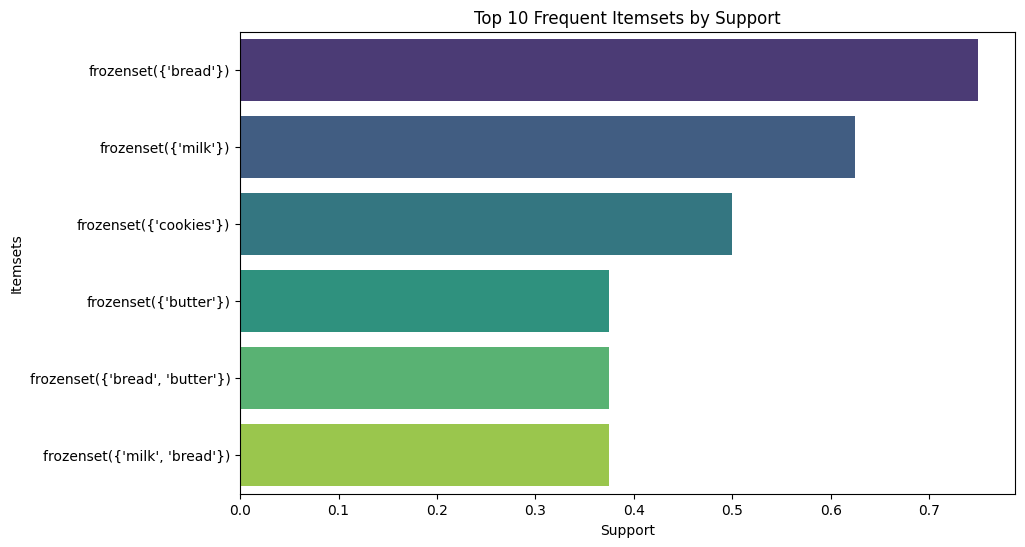

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting support for top 10 frequent itemsets
plt.figure(figsize=(10, 6))
top_support = frequent_itemsets.sort_values(by="support", ascending=False).head(10)
sns.barplot(x="support", y=top_support['itemsets'].astype(str), data=top_support, palette="viridis")
plt.title("Top 10 Frequent Itemsets by Support")
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.show()


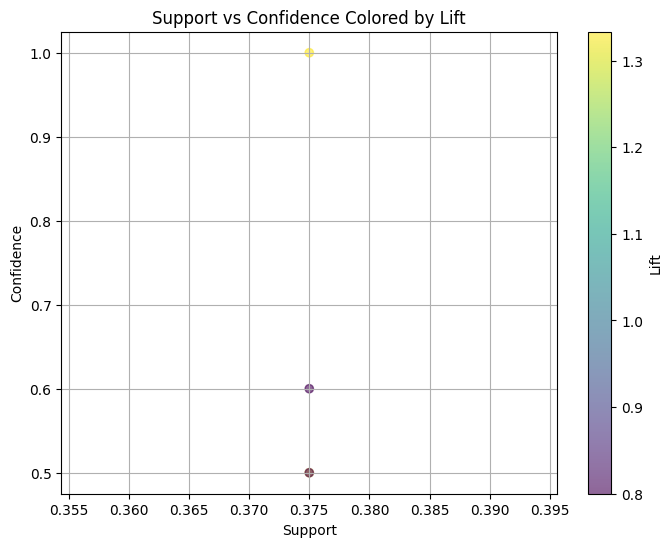

In [9]:
# Scatter plot of support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, c=rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Support vs Confidence Colored by Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()


In [12]:
# Display association rules with key metrics
print("🔗 Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


🔗 Association Rules:
  antecedents consequents  support  confidence      lift
0     (bread)    (butter)    0.375         0.5  1.333333
1    (butter)     (bread)    0.375         1.0  1.333333
2      (milk)     (bread)    0.375         0.6  0.800000
3     (bread)      (milk)    0.375         0.5  0.800000
